# Project 1 - ADVANCED MACHINE LEARNING MODULE

## Google Store App Rating Prediction

## 1

###  Import required libraries and read the data

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Creating data frame from the csv data
df = pd.read_csv('Apps_data.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
# Checking the shape of the data
df.shape

(10841, 13)

In [4]:
# Checking the size of the data
df.size

140933

In [5]:
# Checking the info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


#### Review:

- The Given data set has a 10841 Rows and 13 Columns
- Except **Rating** as a float Column others are all object data type.
- There are null values in the dataset.

## 2

### Data cleansing and Exploratory data analysis

In [6]:
# Checking the statistical summery of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,9367.0,4.193338,0.537431,1.0,4.0,4.3,4.5,19.0


In [7]:
# Checking the statistical summery of the object data type
df.describe(include = 'O').T

,count,unique,top,freq
App,10841,9660,ROBLOX,9
Category,10841,34,FAMILY,1972
Reviews,10841,6002,0,596
Size,10841,462,Varies with device,1695
Installs,10841,22,"1,000,000+",1579
Type,10840,3,Free,10039
Price,10841,93,0,10040
Content Rating,10840,6,Everyone,8714
Genres,10841,120,Tools,842
Last Updated,10841,1378,"August 3, 2018",326


#### Analysis:

- 50% of the apps having rating of equal are less than 4.3
- **Family** is the most occured app category.
- Most apps are available at free of cost.
- Most apps have conent rating as **Everyone**.

Seems like ***Category,Reviews,Size,Installs,Type*** are the most helpful features to bulid the model

In [8]:
# Checking for the duplicate values
df.duplicated().sum()

483

In [9]:
# Droping the duplicate rows by keeping the first occurance
df = df.drop_duplicates()
df.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10207,Profile Tracker - Who Viewed My Facebook Profile,SOCIAL,4.7,37090,4.8M,"500,000+",Free,0,Teen,Social,"August 1, 2018",5.4,4.1 and up
7826,CS Interview FAQs,FAMILY,4.3,99,1.1M,"10,000+",Free,0,Everyone,Education,"February 11, 2013",1.13,2.2 and up
7827,CS,BUSINESS,NaN,5,8.3M,100+,Free,0,Everyone,Business,"August 13, 2015",Release 1.0,4.1 and up
694,Sugar Daddies Dating App,DATING,2.9,53,14M,"10,000+",Free,0,Mature 17+,Dating,"July 10, 2018",4.1,4.1 and up
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up


In [10]:
# Summing up duplicates again for checking
df.duplicated().sum()

0

In [11]:
# Checking uique values in the category feature
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [12]:
# Number of unique categories
df['Category'].nunique()

34

In [13]:
# Count of each unique value in category
df['Category'].value_counts()

FAMILY                 1943
GAME                   1121
TOOLS                   843
BUSINESS                427
MEDICAL                 408
PRODUCTIVITY            407
PERSONALIZATION         388
LIFESTYLE               373
COMMUNICATION           366
FINANCE                 360
SPORTS                  351
PHOTOGRAPHY             322
HEALTH_AND_FITNESS      306
SOCIAL                  280
NEWS_AND_MAGAZINES      264
TRAVEL_AND_LOCAL        237
BOOKS_AND_REFERENCE     230
SHOPPING                224
DATING                  196
VIDEO_PLAYERS           175
MAPS_AND_NAVIGATION     137
EDUCATION               130
FOOD_AND_DRINK          124
ENTERTAINMENT           111
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
HOUSE_AND_HOME           80
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

In [14]:
# Extracting a row that is invalid
df[df['Category'] == '1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [15]:
# Droping the invalid category
df = df.drop(10472)

In [16]:
# Checking for the droping column
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [17]:
# Checking null values in the column Rating
df['Rating'].isna().sum()

1465

In [18]:
# Checking for unique values in Rating column
df['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , nan, 4.8,
       4.9, 3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8,
       2.7, 1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5,
       1.2])

In [19]:
# Creating new data frame with dropping null values in Rating column
df1 = df.dropna(subset=['Rating'])
df1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [20]:
# Checking the null value percentage in the new data frame df1
(df1.isna().sum()/len(df1))*100

App               0.000000
Category          0.000000
Rating            0.000000
Reviews           0.000000
Size              0.000000
Installs          0.000000
Type              0.000000
Price             0.000000
Content Rating    0.000000
Genres            0.000000
Last Updated      0.000000
Current Ver       0.044984
Android Ver       0.022492
dtype: float64

<AxesSubplot:ylabel='Density'>

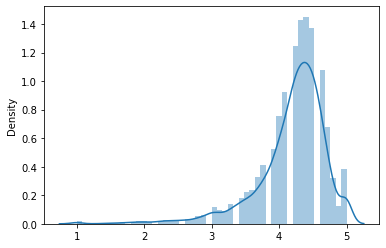

In [21]:
# Checking the distribution of the Rating column
sns.distplot(x = df1['Rating'])

In [22]:
# Mapping the rating column with High and low
rat_group = pd.cut(df1.Rating,bins=[0,3.5,5],labels = ['Low','High'])
df1.insert(13,'Rating_Category',rat_group)

In [23]:
df1.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_Category
10144,EZ-GUI Ground Station,TOOLS,4.7,3696,29M,"50,000+",Free,0,Everyone,Tools,"August 10, 2017",4.5,4.3 and up,High
2704,Extreme Coupon Finder,SHOPPING,4.1,11798,Varies with device,"1,000,000+",Free,0,Everyone,Shopping,"May 10, 2018",Varies with device,Varies with device,High
835,"busuu: Learn Languages - Spanish, English & More",EDUCATION,4.3,206532,21M,"10,000,000+",Free,0,Everyone 10+,Education,"August 1, 2018",13.9.0.161,5.0 and up,High
5097,EZ Ag Mobile,FINANCE,3.4,19,24M,"5,000+",Free,0,Everyone,Finance,"August 12, 2017",9.0.00,3.0 and up,Low
2273,OptoDrum,MEDICAL,3.9,10,378k,"1,000+",Paid,$5.99,Everyone,Medical,"May 26, 2015",1.0,3.0 and up,High


In [24]:
# Counting the number of count unique values in the Rating_Category
df1['Rating_Category'].value_counts()

High    8012
Low      880
Name: Rating_Category, dtype: int64

<AxesSubplot:xlabel='Rating_Category', ylabel='count'>

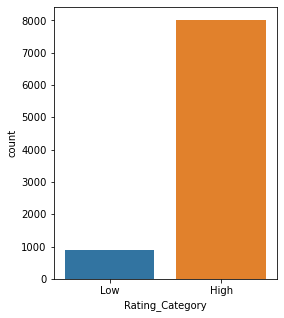

In [25]:
# Plot for the Rating_Category column
plt.figure(figsize = (4,5))
sns.countplot(x = df1['Rating_Category'])

#### Analysis:
- Data distribution is biased.
- It is a imbalanced class with High 8012 and Low with 880 counts.

In [26]:
# Converting Object data type into integer data type
df1['Reviews'] = df1['Reviews'].astype(int)

<AxesSubplot:xlabel='Reviews'>

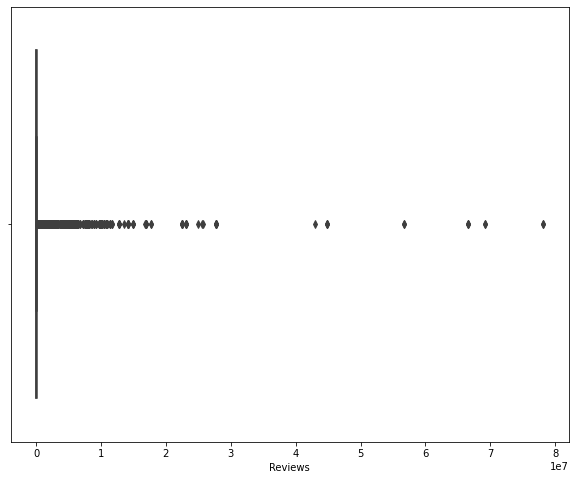

In [27]:
# Box plot for identifying the outliers
plt.figure(figsize = (10,8))
sns.boxplot(x = df1['Reviews'])

In [28]:
# Quantile ranges for identifying the outliers
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Rating         0.50
Reviews    71102.75
dtype: float64


In [29]:
# Checking the skewness of the Reviews column
print(df1['Reviews'].skew())
df1['Reviews'].describe()

16.207669086966867


count    8.892000e+03
mean     4.727764e+05
std      2.905052e+06
min      1.000000e+00
25%      1.640000e+02
50%      4.714500e+03
75%      7.126675e+04
max      7.815831e+07
Name: Reviews, dtype: float64

<AxesSubplot:>

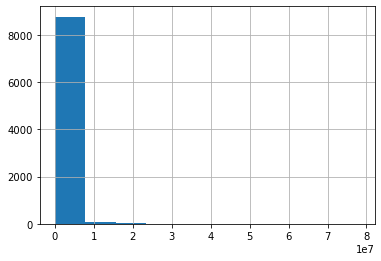

In [30]:
# Histogram representation for Reviews column
df1.Reviews.hist()

In [31]:
# Log transformation for the Reviews column 
df1["Reviews"] = df1["Reviews"].map(lambda i: np.log(i) if i > 0 else 0)
df1['Reviews'].skew()

-0.050909254743112003

count    8892.000000
mean        8.234893
std         3.880200
min         0.000000
25%         5.099866
50%         8.458398
75%        11.174185
max        18.174247
Name: Reviews, dtype: float64

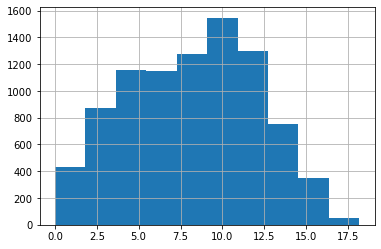

In [32]:
# Checking outliers after Transformation
df1.Reviews.hist()
df1['Reviews'].describe()

In [33]:
# Checking unique values in size 
df1['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M',
       '11M', '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M',
       '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M',
       '5.7M', '8.6M', '2.4M', '27M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '22M', '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M',
       '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M',
       '42M', '9.1M', '55M', '23k', '7.3M', '6.5M', '1.5M', '7.5M', '51M',
       '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M',
       '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k', '8.4M',
       '3.7M', '118k', '44M', '695k', '1.6M', '6.2M', '53M', '1.4M',
      

In [34]:
# Converting M and k into 1000000 and 1000 and Varies with device as NaN
df1['Size'] = df1['Size'].replace({'M':'e+06','k':'e+03','Varies with device':'NaN'},regex = True).astype(float)

<AxesSubplot:ylabel='Density'>

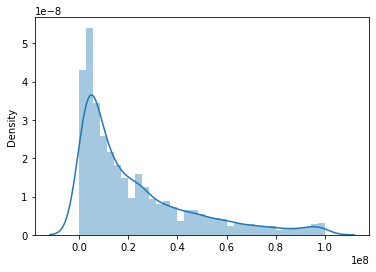

In [35]:
# Distribution plot for a size 
sns.distplot(x = df1['Size'])

In [36]:
# Filling NaN values with mean value
df1['Size'].fillna(df1['Size'].mean(),inplace = True)

In [37]:
# Converting size data type as int
df1['Size'] =  df1['Size'].astype(int)

<AxesSubplot:ylabel='Density'>

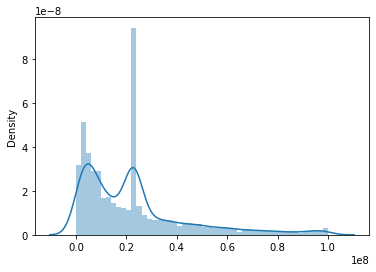

In [38]:
# Distribution after imputing the null values
sns.distplot(x = df1['Size'])

In [39]:
# Checking Unique values in the install
df1['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '100+', '500+', '10+',
       '5+', '50+', '1+'], dtype=object)

In [40]:
# Replacing unwanted signs 
df1['Installs'] = df1['Installs'].str.replace(',','')
df1['Installs'] = df1['Installs'].str.replace('+','').astype(int)

In [41]:
# Rechecking uniques after Removing unwanted signs
df1['Installs'].unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,        100,        500,
               10,          5,         50,          1])

In [42]:
# Checking the unique values in price
df1['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$7.99', '$5.99', '$2.99', '$3.49',
       '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49', '$10.00',
       '$24.99', '$11.99', '$79.99', '$16.99', '$14.99', '$29.99',
       '$12.99', '$2.49', '$10.99', '$1.50', '$19.99', '$15.99', '$33.99',
       '$39.99', '$3.95', '$4.49', '$1.70', '$8.99', '$1.49', '$3.88',
       '$399.99', '$17.99', '$400.00', '$3.02', '$1.76', '$4.84', '$4.77',
       '$1.61', '$2.50', '$1.59', '$6.49', '$1.29', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$8.49', '$1.75', '$14.00', '$2.00',
       '$3.08', '$2.59', '$19.40', '$3.90', '$4.59', '$15.46', '$3.04',
       '$13.99', '$4.29', '$3.28', '$4.60', '$1.00', '$2.95', '$2.90',
       '$1.97', '$2.56', '$1.20'], dtype=object)

In [43]:
# Removing unwanted signs in price and converting data typa as int
df1['Price'] = df1['Price'].str.replace('$','').astype(float)

In [44]:
# Rechecking after converting data type as float
df1['Price'].unique()

array([  0.  ,   4.99,   3.99,   6.99,   7.99,   5.99,   2.99,   3.49,
         1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,  24.99,
        11.99,  79.99,  16.99,  14.99,  29.99,  12.99,   2.49,  10.99,
         1.5 ,  19.99,  15.99,  33.99,  39.99,   3.95,   4.49,   1.7 ,
         8.99,   1.49,   3.88, 399.99,  17.99, 400.  ,   3.02,   1.76,
         4.84,   4.77,   1.61,   2.5 ,   1.59,   6.49,   1.29, 299.99,
       379.99,  37.99,  18.99, 389.99,   8.49,   1.75,  14.  ,   2.  ,
         3.08,   2.59,  19.4 ,   3.9 ,   4.59,  15.46,   3.04,  13.99,
         4.29,   3.28,   4.6 ,   1.  ,   2.95,   2.9 ,   1.97,   2.56,
         1.2 ])

## 3

### Data Preparation for model building

In [45]:
# Info of the data
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8892 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   App              8892 non-null   object  
 1   Category         8892 non-null   object  
 2   Rating           8892 non-null   float64 
 3   Reviews          8892 non-null   float64 
 4   Size             8892 non-null   int32   
 5   Installs         8892 non-null   int32   
 6   Type             8892 non-null   object  
 7   Price            8892 non-null   float64 
 8   Content Rating   8892 non-null   object  
 9   Genres           8892 non-null   object  
 10  Last Updated     8892 non-null   object  
 11  Current Ver      8888 non-null   object  
 12  Android Ver      8890 non-null   object  
 13  Rating_Category  8892 non-null   category
dtypes: category(1), float64(3), int32(2), object(8)
memory usage: 1.1+ MB


In [46]:
# Getting a few samples
df1.sample(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_Category
7910,CU SoCal Mobile Banking,FINANCE,4.0,5.533389,25000000,10000,Free,0.0,Everyone,Finance,"May 2, 2018",4.6.68,4.0.3 and up,High
2814,Adobe Photoshop Express:Photo Editor Collage M...,PHOTOGRAPHY,4.2,13.726465,22747621,50000000,Free,0.0,Everyone,Photography,"July 22, 2018",5.0.508,4.4 and up,High
3362,OnePlus Launcher,PERSONALIZATION,4.0,10.094728,22747621,1000000,Free,0.0,Everyone,Personalization,"August 3, 2018",Varies with device,Varies with device,High


In [47]:
# Checking the content rating column
df1['Content Rating'].describe()

count         8892
unique           6
top       Everyone
freq          7095
Name: Content Rating, dtype: object

#### Comments:

- Content Rating is more biased. Most of the apps are Rated for 'Everyone'. So, The consider this feature is not necessary.
- Remainig Redundent features are **App, Category, Rating, Price, Genres, Last Updated, Current Ver, Android Ver**

In [48]:
# Removing the redundent features
df2 = df1.drop(['App','Category','Rating','Price','Genres','Last Updated','Content Rating','Current Ver','Android Ver'],axis = 1)
df2.sample(5)

,Reviews,Size,Installs,Type,Rating_Category
5578,10.084391,872000,1000000,Paid,High
9176,7.066467,5600000,10000,Free,Low
531,6.996681,5800000,100000,Free,Low
9468,9.526172,41000000,1000000,Free,High
597,6.609349,26000000,50000,Free,High


In [49]:
# Converting Categorical column Rating_Category as Numerical
df2['Rating_Category'] = [1 if i == 'High' else 0 for i in df2['Rating_Category']]
df2.sample(3)

,Reviews,Size,Installs,Type,Rating_Category
3050,11.714093,22747621,5000000,Free,1
701,7.841493,18000000,100000,Free,1
5062,11.667953,2000000,10000000,Free,1


In [50]:
# Encoding the Type Column
df3 = df2.copy()
df3 = pd.get_dummies(df3,prefix = 'Type')
df3.sample(5)

,Reviews,Size,Installs,Rating_Category,Type_Free,Type_Paid
5063,10.546788,4100000,5000000,1,1,0
5187,8.187855,25000000,100000,1,1,0
5759,5.683580,3000000,50000,1,1,0
9010,2.564949,500000,100,1,0,1
6017,5.509388,4000000,10000,1,1,0


In [51]:
# Segrigate the Target and Independent features
X = df3.drop('Rating_Category',axis = 1)
y = df3['Rating_Category'].to_frame()

In [52]:
# Few samples of Independent features
X.sample(3)

,Reviews,Size,Installs,Type_Free,Type_Paid
2342,2.708050,39000000,1000,1,0
7818,7.752765,12000000,100000,1,0
2918,10.417478,3900000,5000000,1,0


In [53]:
# Few samples of Target features
y.sample(3)

,Rating_Category
2241,1
7776,1
3851,1


In [54]:
# Dividing data as Test and Train samples

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 47)

In [55]:
# Standardizing the data
scale = StandardScaler()
X_train.iloc[:,:] = scale.fit_transform(X_train.iloc[:,:])
X_test.iloc[:,:]  = scale.fit_transform(X_test.iloc[:,:])

print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(6224, 5) (2668, 5)
(6224, 1) (2668, 1)


## 4

### Model training, and testing

In [56]:
def fit_n_print(model, X_train, X_test, y_train, y_test):  # take the model, and data as inputs
    
    model.fit(X_train, y_train)   # fit the model with the train data

    pred = model.predict(X_test)  # make predictions on the test set
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)

    print('\033[1;46;13m Train accuracy: \033[0;0m',train_score)
    print('\033[1;46;13m Test accuracy: \033[0;0m',test_score)
    print('\n')
    print('\033[1;46;13m Confusion matrix: \033[0;0m','\n',confusion_matrix(y_test, pred))
    print('\n')
    print('\033[1;46;13m Classification report: \033[0;0m','\n',classification_report(y_test, pred))

#### Decision Tree

In [57]:
# Decision Tree Classifier
dt = DecisionTreeClassifier()
fit_n_print(dt, X_train, X_test, y_train, y_test)

 Train accuracy:  0.9980719794344473
 Test accuracy:  0.8305847076461769


 Confusion matrix:  
 [[  51  198]
 [ 254 2165]]


 Classification report:  
               precision    recall  f1-score   support

           0       0.17      0.20      0.18       249
           1       0.92      0.89      0.91      2419

    accuracy                           0.83      2668
   macro avg       0.54      0.55      0.54      2668
weighted avg       0.85      0.83      0.84      2668



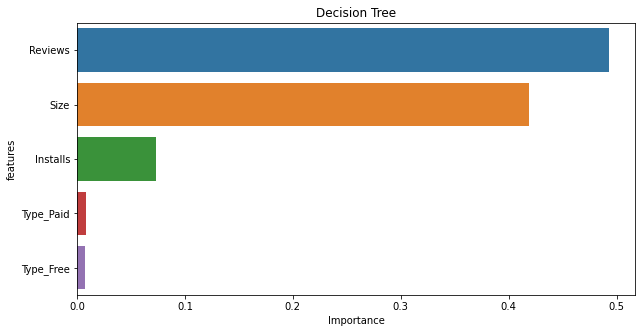

In [58]:
# Finding Feature Imporatnce
feature_importances = pd.DataFrame({'features': X_train.columns, 'Importance': dt.feature_importances_})

feature_importances = feature_importances.sort_values('Importance',ascending=False).reset_index(drop=True)

plt.figure(figsize=(10,5))
sns.barplot(x='Importance',y='features',data=feature_importances)
plt.title('Decision Tree')
plt.show()

#### Random Forest

In [59]:
# Random Forest Classifier
rf = RandomForestClassifier()
fit_n_print(rf, X_train, X_test, y_train, y_test)

 Train accuracy:  0.9980719794344473
 Test accuracy:  0.889055472263868


 Confusion matrix:  
 [[  21  228]
 [  68 2351]]


 Classification report:  
               precision    recall  f1-score   support

           0       0.24      0.08      0.12       249
           1       0.91      0.97      0.94      2419

    accuracy                           0.89      2668
   macro avg       0.57      0.53      0.53      2668
weighted avg       0.85      0.89      0.86      2668



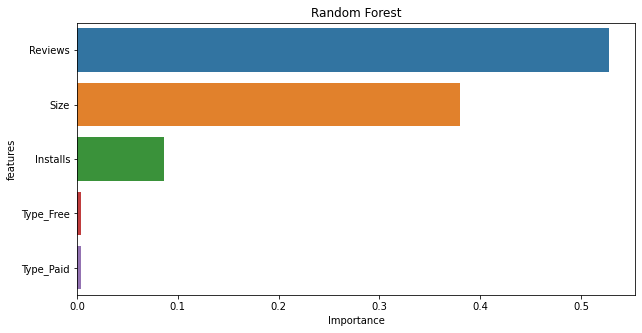

In [60]:
# Feature Importance
feature_importances = pd.DataFrame({'features': X_train.columns, 'Importance': rf.feature_importances_})

feature_importances = feature_importances.sort_values('Importance',ascending=False).reset_index(drop=True)

plt.figure(figsize=(10,5))
sns.barplot(x='Importance',y='features',data=feature_importances)
plt.title('Random Forest')
plt.show()

#### Bagging

In [61]:
# Bagging Classifier
bg = BaggingClassifier()
fit_n_print(bg, X_train, X_test, y_train, y_test)

 Train accuracy:  0.9901992287917738
 Test accuracy:  0.8482008995502249


 Confusion matrix:  
 [[  37  212]
 [ 193 2226]]


 Classification report:  
               precision    recall  f1-score   support

           0       0.16      0.15      0.15       249
           1       0.91      0.92      0.92      2419

    accuracy                           0.85      2668
   macro avg       0.54      0.53      0.54      2668
weighted avg       0.84      0.85      0.85      2668



#### Boosting

#### Gradient Boosting

In [62]:
# Gradient Boosting Classifier 
gb = GradientBoostingClassifier()
fit_n_print(gb, X_train, X_test, y_train, y_test)

 Train accuracy:  0.9029562982005142
 Test accuracy:  0.9044227886056971


 Confusion matrix:  
 [[   1  248]
 [   7 2412]]


 Classification report:  
               precision    recall  f1-score   support

           0       0.12      0.00      0.01       249
           1       0.91      1.00      0.95      2419

    accuracy                           0.90      2668
   macro avg       0.52      0.50      0.48      2668
weighted avg       0.83      0.90      0.86      2668



#### Ada Boosting

In [63]:
# Ada Boosting Classifier
ab = AdaBoostClassifier()
fit_n_print(ab, X_train, X_test, y_train, y_test)

 Train accuracy:  0.899582262210797
 Test accuracy:  0.8958020989505248


 Confusion matrix:  
 [[   8  241]
 [  37 2382]]


 Classification report:  
               precision    recall  f1-score   support

           0       0.18      0.03      0.05       249
           1       0.91      0.98      0.94      2419

    accuracy                           0.90      2668
   macro avg       0.54      0.51      0.50      2668
weighted avg       0.84      0.90      0.86      2668



#### Stacking Classifier

In [64]:
# Stacking Classifier
estimators = [('dt', dt), ('rf', rf), ('bg', bg), ('gb', gb), ('ab', ab)]
clf = StackingClassifier(estimators = estimators, final_estimator = rf)
fit_n_print(clf, X_train, X_test, y_train, y_test)

 Train accuracy:  0.899582262210797
 Test accuracy:  0.8958020989505248


 Confusion matrix:  
 [[   5  244]
 [  34 2385]]


 Classification report:  
               precision    recall  f1-score   support

           0       0.13      0.02      0.03       249
           1       0.91      0.99      0.94      2419

    accuracy                           0.90      2668
   macro avg       0.52      0.50      0.49      2668
weighted avg       0.83      0.90      0.86      2668



## 5

### Conclusion and Improvisation

#### Conclusion

- **Reviews, Size, Installs** are the features most contributing to the model.
- Data is imbalanced causes skew.
- As we can observe Decision Tree, Random Forest, Bagging Classifier, and Stacking classsifier are performing very well on the training data, Random forest performs a bit better and f1 score is high for boosting.
- For better accuracy data should be balanced or we can use sampling the data.